![imgs/hfb3.png](hfb3.png)
# HFB3 notebook demo

**Authors:** N. Dubray, J.-P. Ebran, P. Carpentier, M. Frosini, A. Zdeb, N. Pillet, J. Newsome, M. Verrière, G. Accorto, D. Regnier.  

This notebook presents some ways to use `HFB3` through its `Python` interface.

## Module initialization

In [1]:
# disable OpenMP (HFB3 is meant to be used as a single-thread instance)
%env OMP_NUM_THREADS=1

# import the module
from hfb3 import *

env: OMP_NUM_THREADS=1


## Load a previous result file

We start by loading a file containing the result of a previous run. This can be done with the class `DataTree`.

In [2]:
filename = "42Ca_deformed_1x11.msg.gz"
dataTree = DataTree(filename)
print(dataTree)

DataTree 
│ INT    
│ │ action/nbBlockingTrials: 4
│ │ basis/nOscil: 11
│ │ basis/n_zMax: 24
│ │ solver/basis/maxIter: 40
│ │ solver/broyden/maxIter: 200
│ │ solver/broyden/maxIterLambda: 20
│ │ solver/broyden/mixing/size: 8
│ │ solver/gradient/maxIter: 20
│ │ solver/gradient/maxIterLambda: 20
│ │ solver/gradient/randomSeed: 1337
│ │ state/basis/nOscil: 11
│ │ state/basis/n_zMax: 24
│ │ state/nbIter: 24
│ │ system/nNeut: 22
│ └ system/nProt: 20
│ double 
│ │ basis/b_r: 2.414441e+00
│ │ basis/b_z: 3.117030e+00
│ │ basis/d_0: 0.000000e+00
│ │ basis/g_q: 1.000000e+00
│ │ constraints/q10t: 0.000000e+00
│ │ constraints/q20t: 1.000000e+01
│ │ solver/basis/cvgTarget: 1.000000e-04
│ │ solver/broyden/cvgTarget: 1.000000e-06
│ │ solver/broyden/cvgTargetLambda: 1.000000e-05
│ │ solver/broyden/mixing/linearFactor: 1.000000e-01
│ │ solver/broyden/mixing/mixingfactor: 6.000000e-01
│ │ solver/gradient/cvgTarget: 1.000000e-06
│ │ solver/gradient/cvgTargetLambda: 1.000000e-05
│ │ solver/gradient/cvgTar

Using a `DataTree` instance is the main way for `HFB3` to load and save information.  
Such an instance is similar to a Python `dict` object, as it stores data as a list of (key, value) couples.  
For example, the number of protons of the nuclear system described in this file can be obtained in the following way:

In [3]:
 # get the Integer value associated with the key "system/nProt".
print(f'number of protons: {dataTree.getI("system/nProt")}')

number of protons: 20


## Construct a `State` instance

We construct a `State` instance from the previous `DataTree` instance. A `State` object represent a nuclear state. This can be done directly from the filename:

In [4]:
state = State(filename) # alternative: state = State(DataTree(filename))
print(state)

State 
│ System: 42Ca (Z:20,N:22)
│ Basis : (nOscil:11,b_r:2.414,b_z:3.117,d_0:0.000,g_q:1.0,states:364,max_nz:12)
│ Const.: (q10t:0.000e+00,q20t:1.000e+01)
│ conver: True
│ rho(n): 364x364 (1059968 bytes), 1.868e+00, 3310522432758974ed534866a5989a58
│ rho(p): 364x364 (1059968 bytes), 1.866e+00, e20617bcf27f6203b48dedd381e7e38a
│ kap(n): 364x364 (1059968 bytes), 9.473e-01, ff2bd591d9792e29adb005a824f2ad1d
│ kap(p): 364x364 (1059968 bytes), 9.555e-08, 68c430cac4399038dc5f0c21dafad7ce
│ U(n)  : 0x0 (0 bytes), 0.000e+00, d41d8cd98f00b204e9800998ecf8427e
│ U(p)  : 0x0 (0 bytes), 0.000e+00, d41d8cd98f00b204e9800998ecf8427e
│ V(n)  : 0x0 (0 bytes), 0.000e+00, d41d8cd98f00b204e9800998ecf8427e
│ V(p)  : 0x0 (0 bytes), 0.000e+00, d41d8cd98f00b204e9800998ecf8427e
│ bloc.n: -1
│ bloc.p: -1
│ eneTot: -3.620428e+02
│ chemPn: -9.816569e+00
│ chemPp: -7.166916e+00
│ ZpeGcm: 0.000000e+00
└ ZpeAtd: 0.000000e+00


One can see that this nuclear state correspond to 42Ca, and contains 364x364 rho and kappa matrices.
Such matrices are automatically converted to `numpy.array` instances:

In [5]:
import numpy as np
print(f"norm of rho(NEUTRON): {np.linalg.norm(state.rho(NEUTRON), ord = 2)}")

norm of rho(NEUTRON): 0.9997389784145843


## Calculate (num. int.) the multipole moments of the state

We can use the `Geometry` class to numerically calculate the mean value of the usual multipole moments for the previous nuclear state:

In [6]:
print(Geometry(state))

Geometry 
│ <Q00> : (total: 1.184750e+01)
│ <Q10> : (total: 2.385900e-15)
│ <Q20> : (total: 9.993925e+00)
│ <Q30> : (total: 5.392608e-14)
│ <Q40> : (total: 1.779839e+02)
│ <Q50> : (total:-1.252536e-12)
│ <Q60> : (total: 2.591907e+04)
└ beta  : (total: 5.728576e-02)


## Calculate (ana. int.) the multipole moments of the state

The same can be done analytically by using a `MultipoleOperators` instance:

In [7]:
print(MultipoleOperators(state))

MultipoleOperators 
│ <Q00> : (neut.: 6.206086e+00, prot.: 5.641896e+00, total: 1.184798e+01)
│ <Q10> : (neut.: 1.742137e-14, prot.:-1.742137e-14, total: 1.114266e-29)
│ <Q20> : (neut.: 6.379676e+00, prot.: 3.620324e+00, total: 1.000000e+01)
│ <Q30> : (neut.: 7.430374e-14, prot.: 1.905004e-14, total: 9.335378e-14)
│ <Q40> : (neut.: 1.373172e+02, prot.: 4.077605e+01, total: 1.780933e+02)
│ <Q50> : (neut.: 7.726760e-13, prot.:-3.274895e-12, total:-2.502219e-12)
│ <Q60> : (neut.: 1.958691e+04, prot.: 6.336438e+03, total: 2.592335e+04)
└ beta  : (neut.: 6.981293e-02, prot.: 4.357901e-02, total: 5.732059e-02)


## Calculate energy contributions

We calculate and print the energy contribution associated with each part of the effective nucleon-nucleon interaction D1S for the previous nuclear state:

In [8]:
interaction = Interaction("D1S", state)
interaction.calcEnergies()
print(interaction)

Interaction 
│ Kinet.: (Dn:  369.860579, Dp:  309.733484)
│ Centr.: (Dn:-1001.729840, Dp:-1009.472166, En:  456.097518, Ep:  449.152371, Pn:    4.492861, Pp:    0.000000)
│ Centr.: (Dn:  -44.636066, Dp:  -21.056042, En: -527.734196, Ep: -514.596089, Pn:   -8.902644, Pp:   -0.000000)
│ CoulSl: (Dn:    0.000000, Dp:   79.044428, En:    0.000000, Ep:   -7.440938)
│ Densi.: (Dn:  552.709280, Dp:  552.709280)
│ SpiOrb: (Dn:   -7.100356, Dp:   -1.675028)
│ COMas2: (Dn:    4.621815, Dp:    3.673730, Pn:    0.205243, Pp:    0.000000)
└ Rearr.: (Dn:   96.139870, Dp:   88.095737)


One can also use an alternate display for such energy contributions:

In [9]:
print(interaction.getNiceInfo())

┌─────────────────────────────────────────────────────────────────────────┐
│ Energies                               Neutron      Proton    Neut+Prot │
│                                         [MeV]       [MeV]       [MeV]   │
│ kinetic Direct                          369.861     309.733     679.594 │
│ central Direct                        -1001.730   -1009.472   -2011.202 │
│ central Exchange                        456.098     449.152     905.250 │
│ central Pairing                           4.493       0.000       4.493 │
│ central Direct                          -44.636     -21.056     -65.692 │
│ central Exchange                       -527.734    -514.596   -1042.330 │
│ central Pairing                          -8.903      -0.000      -8.903 │
│ coulomb (Slater) Direct                   0.000      79.044      79.044 │
│ coulomb (Slater) Exchange                 0.000      -7.441      -7.441 │
│ density Direct                          552.709     552.709    1105.419 │
│ spin-orbit

## Calculate and plot local the local 1-body density (using `matplotlib`)

We calculate and plot the local one-body density in the $(r_\perp, z)$ plane. This is done using an instance of the `Discrete` class.

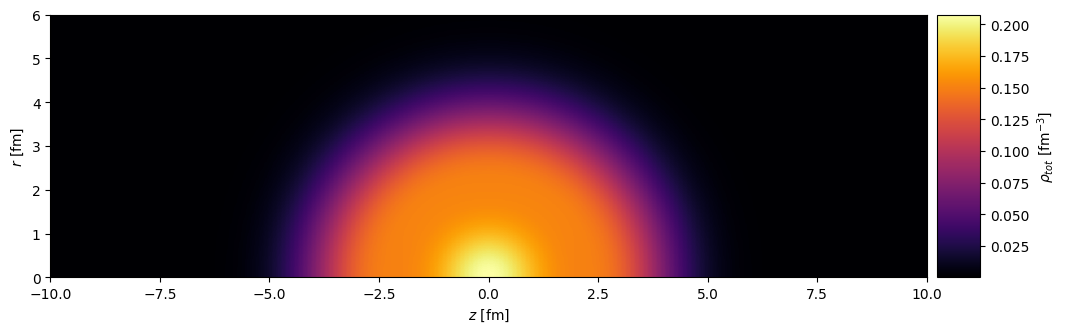

In [10]:
def plot_matplotlib(_state, zmin, zmax, xmin, xmax):
    discrete = Discrete(_state.basis, Mesh.regular(xmin, 0, zmin, xmax, 0, zmax, 101, 1, 201))
    denst = discrete.getLocalXZ(_state.rho(NEUTRON) + _state.rho(PROTON), True)
  
    import numpy as np
    from matplotlib.pyplot import cm
    import matplotlib.pyplot as plt
    from mpl_toolkits.axes_grid1 import make_axes_locatable

    fig = plt.figure(1, figsize=(12, 12))
    ax = plt.gca()
    im = ax.imshow(np.flip(denst, axis = 0), cmap = cm.inferno, extent = [zmin, zmax, xmin, xmax])
    plt.xlabel(r'$z$ [fm]')
    plt.ylabel(r'$r$ [fm]')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    plt.colorbar(im, cax=cax)
    plt.ylabel(r'$\rho_{tot}$ [fm$^{-3}$]')
    plt.show()
    
plot_matplotlib(state, -10, 10, 0, 6)

## Calculate and plot local the local 1-body density (using `bokeh`)

We can do the same plot with the `bokeh` Python module:

In [11]:
def plot_bokeh(_state, zmin, zmax, xmin, xmax):
    discrete = Discrete(_state.basis, Mesh.regular(xmin, 0, zmin, xmax, 0, zmax, 101, 1, 201))
    denst = discrete.getLocalXZ(_state.rho(NEUTRON) + _state.rho(PROTON), True)
  
    from bokeh.io import output_notebook
    output_notebook()
    from bokeh.plotting import figure, show
    from bokeh.models import ColorBar, LinearColorMapper
    p = figure(tools = "pan, reset, save, wheel_zoom", height = 300, width = 800,
               active_drag = "pan", active_scroll = "wheel_zoom", match_aspect = True,
               x_axis_label = 'z [fm]', y_axis_label = 'r [fm]')
    color = LinearColorMapper(palette = "Inferno256")
    p.image(image = [denst], x = zmin, y = xmin, dw = zmax - zmin, dh = xmax - xmin, color_mapper = color)
    color_bar = ColorBar(color_mapper = color, label_standoff = 10, location = (0,0), width = 10)
    p.add_layout(color_bar, 'right')
    show(p)

plot_bokeh(state, -10, 10, 0, 6)

Loading BokehJS ...

## Perform a 1ct Constrained HFB calculation

Here, we calculate the HFB nuclear state minimizing the total binding energy under the action of a constraint on the quadrupole mass moment, using a fixed 1-center HO basis. The solver uses the Broyden mixing method. The basis parameters and the initial HFB state are taken from a previous result stored in file (`42Ca_deformed_1x11.msg.gz`). A constraint on the center of mass of the system (`q10t`) is automatically set with the value 0.0.

In [12]:
%env OMP_NUM_THREADS=1
dataTree = DataTree("42Ca_deformed_1x11.msg.gz")
dataTree.setD("constraints/q20t", 15.0)
solverHFB = SolverHFBBroyden(dataTree)
solverHFB.lambdaMax = 1e-03
solverHFB.init()
while(solverHFB.nextIter()): pass
print(solverHFB.interaction.getNiceInfo())
print(MultipoleOperators(solverHFB.state).getNiceInfo())

env: OMP_NUM_THREADS=1
SolBro: #it: 000 cvg: 2.60e-01 ene:  -362.043 ln:  -9.817(# 0) lp:  -7.167(# 0)
SolBro: #it: 001 cvg: 1.11e-01 ene:  -364.566 ln:  -9.837(#20) lp:  -7.167(# 0)
SolBro: #it: 002 cvg: 1.80e-01 ene:  -364.614 ln: -10.111(# 4) lp:  -7.167(# 0)
SolBro: #it: 003 cvg: 1.61e-01 ene:  -364.179 ln: -10.108(# 3) lp:  -7.167(# 0)
SolBro: #it: 004 cvg: 1.44e-01 ene:  -363.784 ln: -10.103(# 2) lp:  -7.167(# 0)
SolBro: #it: 005 cvg: 1.28e-01 ene:  -363.428 ln: -10.098(# 2) lp:  -7.167(# 0)
SolBro: #it: 006 cvg: 1.14e-01 ene:  -363.108 ln: -10.092(# 2) lp:  -7.167(# 0)
SolBro: #it: 007 cvg: 1.02e-01 ene:  -362.821 ln: -10.085(# 2) lp:  -7.167(# 0)
SolBro: #it: 008 cvg: 9.02e-02 ene:  -362.565 ln: -10.078(# 2) lp:  -7.167(# 0)
SolBro: #it: 009 cvg: 1.42e-01 ene:  -363.681 ln: -10.070(# 2) lp:  -7.167(# 0)
SolBro: #it: 010 cvg: 8.89e-03 ene:  -361.406 ln:  -9.976(# 3) lp:  -7.167(# 0)
SolBro: #it: 011 cvg: 6.36e-03 ene:  -361.492 ln:  -9.953(# 4) lp:  -7.167(# 0)
SolBro: #it: 012 

The final total HFB energy should be -361.703 MeV. In the "Deformations" table, the constrained values are printed in blue.

## Perform a 2ct Constrained HFB calculation (with live visualization using `bokeh`)

We now calculate a similar HFB nuclear state, using a 2-center HO basis. A separate bokeh server can be launched to generate a live visualization of the nuclear state during HFB convergence.

In [13]:
%env OMP_NUM_THREADS=1

# launch a bokeh server before this (`bin/bokehserver.py`), and open the proposed page in your browser.
cvar.useBokeh = True
Plot.clear()

dataTree = DataTree("42Ca_deformed_2x9.msg.gz")
#print(MultipoleOperators(BogoliubovState(dataTree)))
dataTree.setD("constraints/q20t", 12.0)
solverHFBBroyden = SolverHFBBroyden(dataTree)
solverHFBBroyden.plotDensities = True
solverHFBBroyden.init()
print(solverHFBBroyden)
while(solverHFBBroyden.nextIter()): pass
print(solverHFBBroyden.interaction.getNiceInfo())
print(MultipoleOperators(solverHFBBroyden.state).getNiceInfo())

cvar.useBokeh = False

env: OMP_NUM_THREADS=1
SolverHFBBroyden 
│ bogoSt: (sys.:42Ca,cst.:(q10t:0.000e+00,q20t:1.200e+01),cvg.:true,ene.:-3.623e+02)
│ basis : (nOscil:9,b_r:2.388,b_z:3.109,d_0:5.000,g_q:1.3,states:438,max_nz:12)
│ interaction: D1S (Kinet.,Centr.,Centr.,CoulSl,Densi.,SpiOrb,COMas2,Rearr.)
│ momen.: (Q00:1.184798e+01,Q10:3.217208e-15,Q20:1.000000e+01,Q30:1.497259e-04,beta:5.732059e-02)
│ mixing: (m.size:8,lfact.:1.000000e-01,mfact.:6.000000e-01)
│ maxIt.: 200
│ target: 1.000000e-06
│ maxItL: 20
│ ltarg.: 1.000000e-09
│ bloc.n: none
└ bloc.p: none
SolBro: #it: 000 cvg: 2.70e-01 ene:  -362.329 ln:  -9.876(# 5) lp:  -6.996(# 0)
SolBro: #it: 001 cvg: 5.13e+01 ene:  -363.374 ln:  -9.896(#20) lp:  -7.016(#20)
SolBro: #it: 002 cvg: 5.13e+00 ene:  -362.769 ln:  -9.861(# 8) lp:  -7.016(# 0)
SolBro: #it: 003 cvg: 4.61e+00 ene:  -362.871 ln:  -9.870(# 5) lp:  -7.016(# 0)
SolBro: #it: 004 cvg: 4.14e+00 ene:  -362.945 ln:  -9.879(# 5) lp:  -7.016(# 0)
SolBro: #it: 005 cvg: 3.71e+00 ene:  -362.993 ln:  -9.8

The final total HFB energy should be -362.181 MeV.

## Perform a 2ct Constrained HFB calculation (with `SolverHFBGrad`)

For this HFB calculation, we use a solver implementing the Gradiend method.

In [14]:
%env OMP_NUM_THREADS=1
dataTree = DataTree("42Ca_deformed_2x9.msg.gz")
dataTree.setD("constraints/q20t", 12.0)
dataTree.setI("solver/gradient/maxIter", 100)
solverHFBGradient = SolverHFBGradient(dataTree)
solverHFBGradient.init()
print(solverHFBGradient)
while(solverHFBGradient.nextIter()): pass
print(solverHFBGradient.interaction.getNiceInfo())
print(MultipoleOperators(solverHFBGradient.state).getNiceInfo())

env: OMP_NUM_THREADS=1
SolGra: starting from previous rho and kappa
State.: Updating U and V matrices from rho and kappa matrices
SolBro: #it: 000 cvg: 2.70e-01 ene:  -362.329 ln:  -9.876(# 5) lp:  -6.996(# 0)
SolverHFBGradient 
│ bogoSt: (sys.:42Ca,cst.:(q10t:0.000e+00,q20t:1.200e+01),cvg.:true,ene.:-3.623e+02)
│ basis : (nOscil:9,b_r:2.388,b_z:3.109,d_0:5.000,g_q:1.3,states:438,max_nz:12)
│ interaction: D1S (Kinet.,Centr.,Centr.,CoulSl,Densi.,SpiOrb,COMas2,Rearr.)
│ multipoleOp.: (Q00:1.184798e+01,Q10:3.217208e-15,Q20:1.000000e+01,Q30:1.497259e-04,beta:5.732059e-02)
│ maxIt.: 100
│ target: 1.000000e-06
│ litMax: 20
└ ltarg.: 1.000000e-09
SolGra: #it: 000 cvg: 4.41e+01 ene:  -362.329 ln: -13.100 lp:  -6.996 (# 4)
SolGra: #it: 001 cvg: 4.89e-01 ene:  -362.168 ln:  -9.812 lp:  -6.996 (# 4)
SolGra: #it: 002 cvg: 6.53e-01 ene:  -362.172 ln:  -9.947 lp:  -6.996 (# 3)
SolGra: #it: 003 cvg: 4.22e-01 ene:  -362.174 ln:  -9.944 lp:  -6.996 (# 3)
SolGra: #it: 004 cvg: 3.64e-01 ene:  -362.176 ln

The final total HFB energy should be -362.181 MeV, and the multipole moments should be close from the ones found with the Broyden-mixing solver.

## Compare the multipole moments between solvers

One can compare the total multipole moments for both solvers with a numerical integration:

In [15]:
print(Geometry(solverHFBGradient.state))
print(Geometry(solverHFBBroyden.state))

Geometry 
│ <Q00> : (total: 1.184748e+01)
│ <Q10> : (total:-1.577315e-11)
│ <Q20> : (total: 1.199305e+01)
│ <Q30> : (total: 1.803102e-06)
│ <Q40> : (total: 9.716440e+01)
│ <Q50> : (total:-8.658524e-06)
│ <Q60> : (total: 1.519783e+04)
└ beta  : (total: 6.874485e-02)
Geometry 
│ <Q00> : (total: 1.184748e+01)
│ <Q10> : (total:-9.476998e-11)
│ <Q20> : (total: 1.199305e+01)
│ <Q30> : (total: 1.977071e-05)
│ <Q40> : (total: 9.716372e+01)
│ <Q50> : (total:-7.558287e-05)
│ <Q60> : (total: 1.519774e+04)
└ beta  : (total: 6.874485e-02)


## Plot the local 1-body densities

We can plot the local 1-body nuclear densities for each solver:

In [16]:
plot_bokeh(solverHFBGradient.state, -10, 10, -6, 6)
plot_bokeh(solverHFBBroyden.state, -10, 10, -6, 6)

Loading BokehJS ...

Loading BokehJS ...